# Домашнє завдання





## Частина 1

​

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.





## Частина 2

​

В цій частині ми знову будемо працювати з датасетом fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.backend import clear_session
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array, array_to_img

Задамо деякі параметри архітектури нейронної мережи та параметри навчання:

In [2]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = (28, 28, 1) # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

Завантажимо датасет fashion mnist та нормалізуємо дані:

In [3]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

Побудуємо модель, схожу на останню, отриману у попередньому ДЗ, але приберемо один з шарів, зменшимо кількість нейронів вчетверо в іншому та додамо кілька кілька типових згорткових та пулінг шарів. А також зменшимо кількість епох навчання:



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

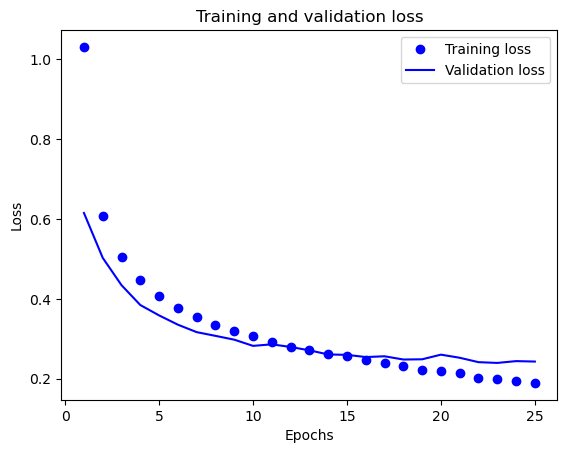

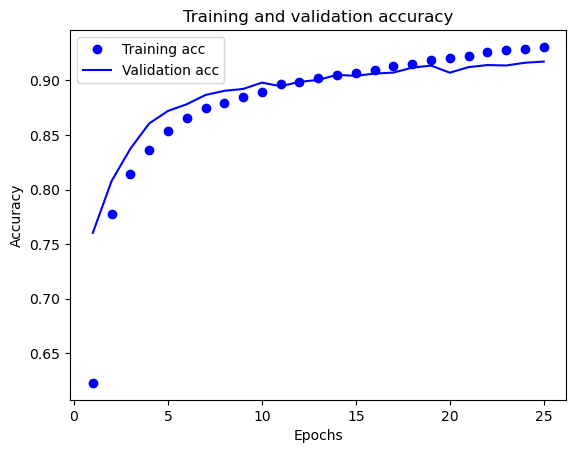

In [4]:
clear_session()

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=num_features),  # Згортковий шар з 64 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Висновок
Як бачимо, додавання згорткових та пулінг шарів дозволило нам досягнути гарного результату у порівнянні з моделлю з попереднього ДЗ - досягти точності більш ніж 91% на тестових даних всього лише за 25 епох навчання, а не за 1000. І найголовніше - уникнути перенавчання.

Завантажимо датасет fashion mnist, перетворимо зображення з одноканальних у триканальні, зробимо upscale та нормалізуємо дані:

In [5]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо зображення з одноканальних у триканальні
x_train = np.reshape(x_train, (len(x_train), 784))
x_train = np.dstack([x_train] * 3)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))

x_test = np.reshape(x_test, (len(x_test), 784))
x_test = np.dstack([x_test] * 3)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 3))

# Upscale зображень
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32, 32))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32, 32))) for im in x_test])

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

А тепер зробимо все теж саме, що й у першій частині завдання, але замість того, щоб власноруч визначати згорткові та пулінг шари, скористаємося відомою переднавченою моделлю VGG16:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/2

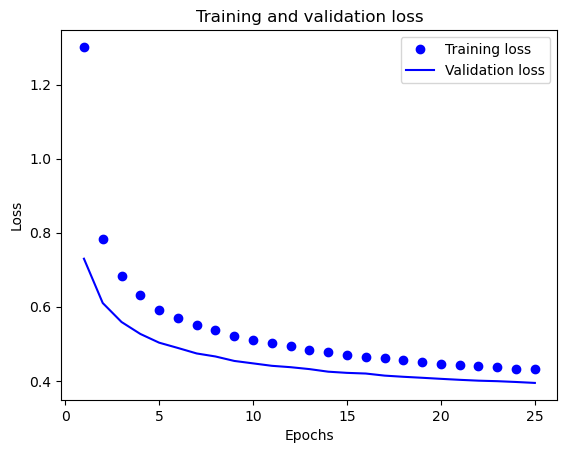

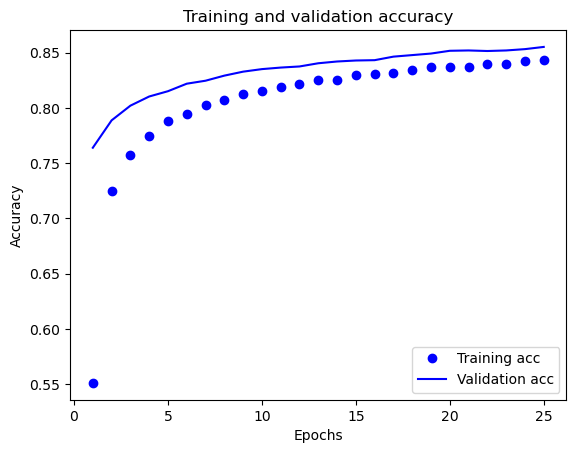

In [6]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Як видно з графіків, модель з VGG16 успішно навчається і за 25 епох не досягла максимуму, але збіжність бажано могла б бути швидшою, особливо враховуючи обчислювальну складність та повільність моделі. Спробуємо перенавчити останній згортковий шар VGG16:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 2493706 (9.51 MB)
Non-trainable params: 12354880 (47.13 MB)
_________________________________________________________________
Epoch 1/25

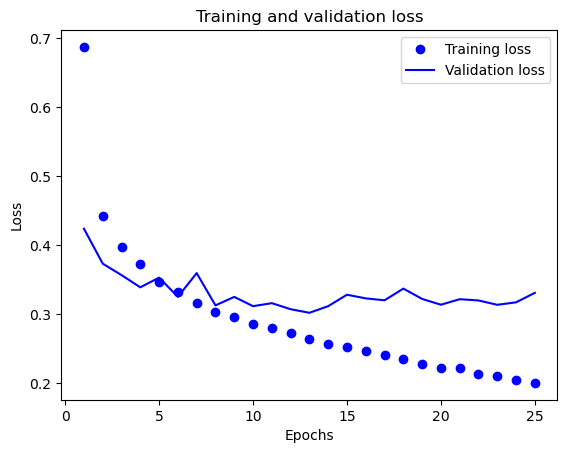

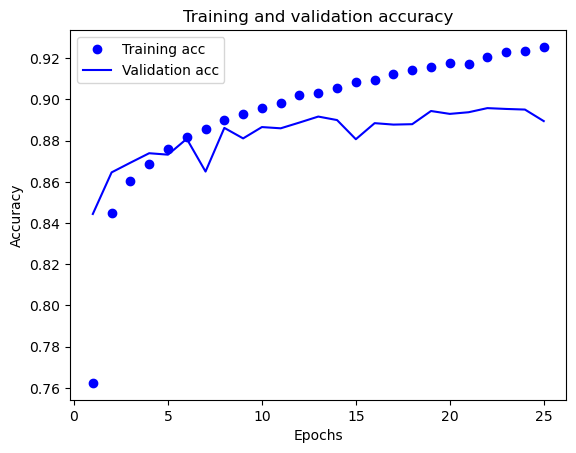

In [7]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == "block5_conv3":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат не є вражаючим. Спробуємо перенавчити усі згорткові шари на останньому блоці VGG16:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 7213322 (27.52 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________
Epoch 1/25

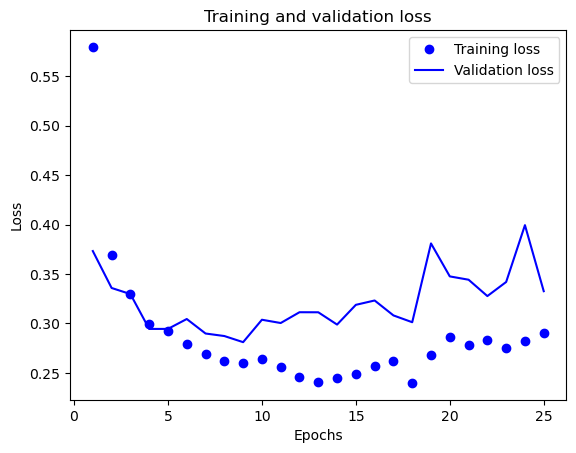

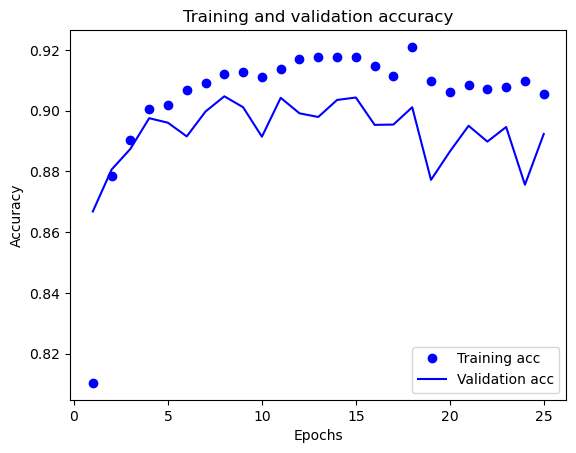

In [8]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name.startswith("block5_"):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(256, activation='sigmoid'),  # Повнозв'язний шар з 256 нейронами
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

І знову результат не вражаючий. Але спробуємо тепер прибрати частину нашиих кастомних повнозв'язних шарів:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14719818 (56.15 MB)
Trainable params: 7084554 (27.03 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________
Epoch 1/25
235/235 [==============================] - 263s 1s/step - loss: 0.4507 - accuracy: 0.8355 - val_loss: 0.3367 - val_accuracy: 0.8757
Epoch 2/25
235/235 [==============================] - 262s 1s/step - loss: 0.2861 - accuracy: 0.8938 - val_loss: 0.2967 - val_accur

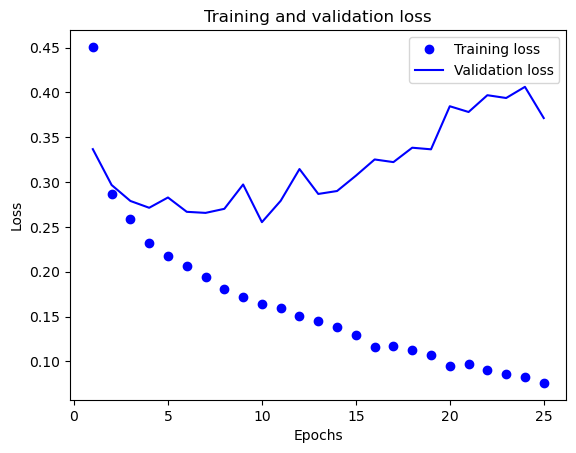

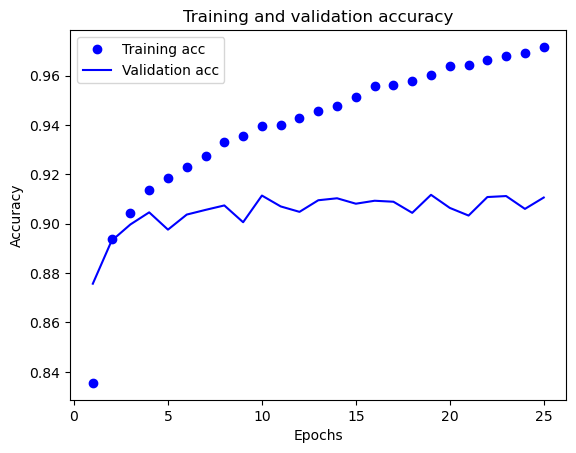

In [9]:
clear_session()

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name.startswith("block5_"):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential([
    vgg16,

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(num_classes, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=256,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Висновок
І нарешті тепер ми досягли всього за 10-11 епох результату бл. 91% точності на тестових даних, уникнувши перенавчання. Для порівняння - у попередньому ДЗ ми хоч і досягли такої точності (за 1000 епох), але перенавчання уникнути не вдалося.